# Robotics, Vision & Control 3e: for Python
## Chapter 2: Representing position & orientation

Copyright (c) 2021- Peter Corke

In [1]:
try:
    from google.colab import output
    print('Running on CoLab')
    output.enable_custom_widget_manager()
    !pip install ipympl
    !pip install spatialmath-python
    COLAB = True
    SWIFT = False
except ModuleNotFoundError:
    COLAB = False
    SWIFT = False
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.display import HTML

# standard imports
import numpy as np
from scipy import linalg
%matplotlib widget
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *

There are some minor code changes compared to the book. These are to support 
the Matplotlib widget (ipympl) backend.  This allows 3D plots to be rotated
so the changes are worthwhile.

# 2.1 Foundations


# 2.2 Working in Two Dimensions (2D)


## 2.2.1 Orientation in Two Dimensions


### 2.2.1.1 2D Rotation Matrix


In [2]:
R = rot2(0.3)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

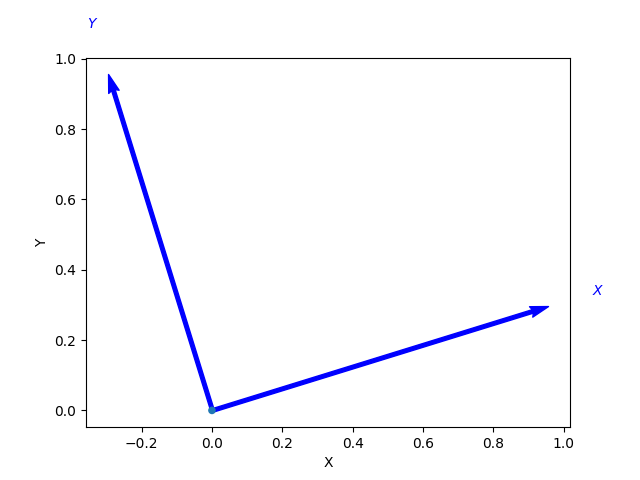

In [3]:
plotvol2(new=True)  # for matplotlib/widget
trplot2(R);

In [4]:
np.linalg.det(R)

0.9999999999999999

In [5]:
np.linalg.det(R @ R)

0.9999999999999998

In [6]:
from sympy import Symbol, Matrix, simplify, pprint
theta = Symbol('theta')
R = Matrix(rot2(theta))  # convert to SymPy matrix

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [7]:
simplify(R * R)

Matrix([
[cos(2*theta), -sin(2*theta)],
[sin(2*theta),  cos(2*theta)]])

In [8]:
R.det()

sin(theta)**2 + cos(theta)**2

In [9]:
R.det().simplify()

1

### 2.2.1.2 Matrix Exponential for Rotation


In [10]:
R = rot2(0.3);

In [11]:
L = linalg.logm(R)  # using linalg package of SciPy

array([[       0,     -0.3],
       [     0.3,        0]])

In [12]:
S = vex(L)

array([     0.3])

In [13]:
X = skew(2)

array([[       0,       -2],
       [       2,        0]])

In [14]:
vex(X)

array([       2])

In [15]:
linalg.expm(L)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [16]:
linalg.expm(skew(S))

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

## 2.2.2 Pose in Two Dimensions


### 2.2.2.1 2D Homogeneous Transformation Matrix


In [17]:
rot2(0.3)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [18]:
trot2(0.3)

array([[  0.9553,  -0.2955,        0],
       [  0.2955,   0.9553,        0],
       [       0,        0,        1]])

In [19]:
TA = transl2(1, 2) @ trot2(30, "deg")

array([[   0.866,     -0.5,        1],
       [     0.5,    0.866,        2],
       [       0,        0,        1]])

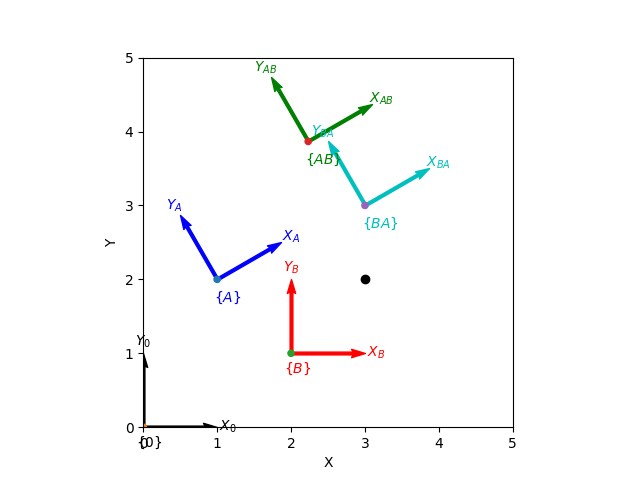

In [20]:
plotvol2([0, 5], new=True); # new plot with both axes from 0 to 5
trplot2(TA, frame="A", color="b");
T0 = transl2(0, 0);
trplot2(T0, frame="0", color="k");  # reference frame
TB = transl2(2, 1)
trplot2(TB, frame="B", color="r");
TAB = TA @ TB
trplot2(TAB, frame="AB", color="g");
TBA = TB @ TA;
trplot2(TBA, frame="BA", color="c");
P = np.array([3, 2]);
plot_point(P, "ko", label="P");

In [21]:
print(TA)
print(P)
np.linalg.inv(TA) @ np.hstack([P, 1])

[[   0.866     -0.5        1]
 [     0.5    0.866        2]
 [       0        0        1]]
[3 2]


array([   1.732,       -1,        1])

In [22]:
h2e(np.linalg.inv(TA) @ e2h(P))

array([[   1.732],
       [      -1]])

In [23]:
homtrans(np.linalg.inv(TA), P)

array([[   1.732],
       [      -1]])

### 2.2.2.2 Rotating a Coordinate Frame


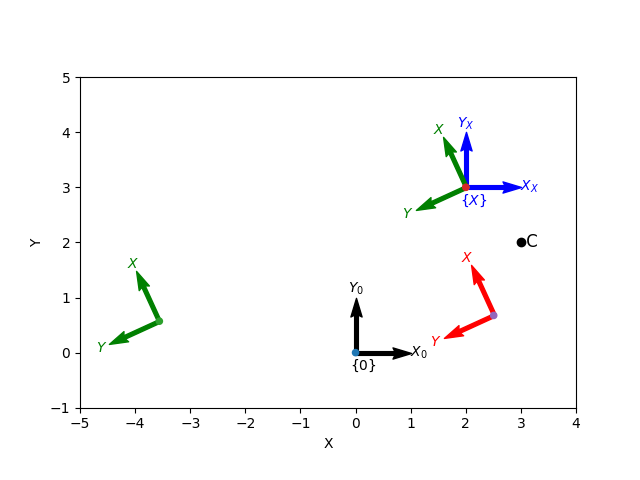

In [24]:
plotvol2([-5, 4, -1, 5], new=True);  # for matplotlib/widget
T0 = transl2(0, 0);
trplot2(T0, frame="0", color="k");
TX = transl2(2, 3);
trplot2(TX, frame="X", color="b");
TR = trot2(2);
trplot2(TR @ TX, framelabel="RX", color="g");
trplot2(TX @ TR, framelabel="XR", color="g");
C = np.array([3, 2]);
plot_point(C, "ko", text="C");
TC = transl2(C) @ TR @ transl2(-C)
trplot2(TC @ TX, framelabel="XC", color="r");

### 2.2.2.3 Matrix exponential for Pose


In [25]:
L = linalg.logm(TC)

array([[       0,       -2,        4],
       [       2,        0,       -6],
       [       0,        0,        0]])

In [26]:
S = vexa(L)

array([       4,       -6,        2])

In [27]:
linalg.expm(skewa(S))

array([[ -0.4161,  -0.9093,    6.067],
       [  0.9093,  -0.4161,   0.1044],
       [       0,        0,        1]])

In [28]:
X = skewa([1, 2, 3])

array([[       0,       -3,        1],
       [       3,        0,        2],
       [       0,        0,        0]])

In [29]:
vexa(X)

array([       1,        2,        3])

### 2.2.2.4 2D Twists


In [30]:
S = Twist2.UnitRevolute(C)

(2 -3; 1)

In [31]:
linalg.expm(skewa(2 * S.S))

array([[ -0.4161,  -0.9093,    6.067],
       [  0.9093,  -0.4161,   0.1044],
       [       0,        0,        1]])

In [32]:
S.exp(2)

  -0.4161   -0.9093    6.067     
   0.9093   -0.4161    0.1044    
   0         0         1         


In [33]:
S.pole

array([       3,        2])

In [34]:
S = Twist2.UnitPrismatic([0, 1])

(0 1; 0)

In [35]:
S.exp(2)

   1         0         0         
   0         1         2         
   0         0         1         


In [36]:
T = transl2(3, 4) @ trot2(0.5)

array([[  0.8776,  -0.4794,        3],
       [  0.4794,   0.8776,        4],
       [       0,        0,        1]])

In [37]:
S = Twist2(T)

(3.9372 3.1663; 0.5)

In [38]:
S.w

0.5

In [39]:
S.pole

array([  -3.166,    3.937])

In [40]:
S.exp(1)

   0.8776   -0.4794    3         
   0.4794    0.8776    4         
   0         0         1         


# 2.3 Working in Three Dimensions (3D)


## 2.3.1 Orientation in Three Dimensions


### 2.3.1.1 3D Rotation Matrix


In [41]:
R = rotz(pi / 2)

array([[       0,       -1,        0],
       [       1,        0,        0],
       [       0,        0,        1]])

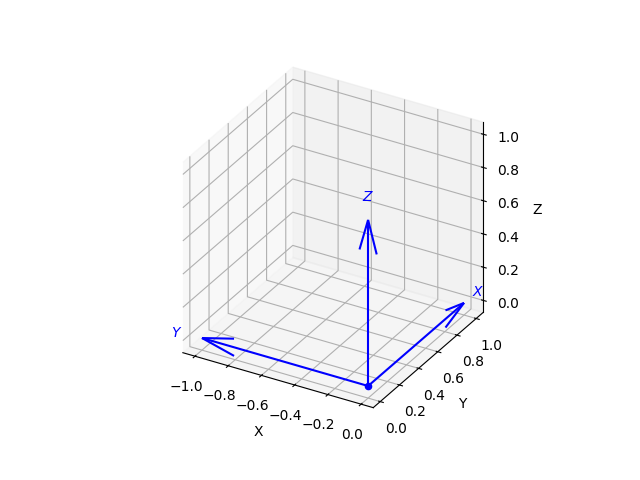

In [42]:
plotvol3(new=True)  # for matplotlib/widget
trplot(R);

In [43]:
# tranimate(R)
plotvol3(new=True)  # for matplotlib/widget
HTML(tranimate(R, movie=True, dim=1.5))

<span style="background-color:red; font-size:20pt">NOTE</span>

Robust, portable animation in Jupyter notebooks is challenging.  Here we use an option to `tranimate` that causes it to return the animation as a snippet of HTML5 which is then displayed
```
HTML(tranimate(R, movie=True))
```
If you wish to animate a coordinate frame from a regular Python script use the simpler syntax
```
tranimate(R)
```


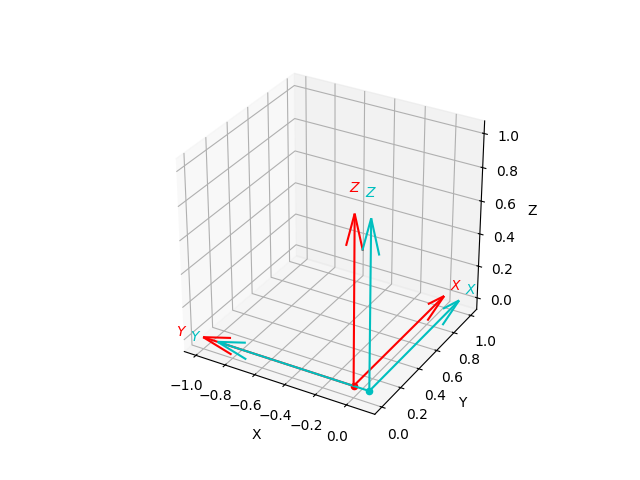

In [44]:
plotvol3(new=True)  # for matplotlib/widget
trplot(R, anaglyph=True)

In [45]:
plotvol3(new=True)  # for matplotlib/widget
HTML(tranimate(R, anaglyph=True, movie=True, dim=1.5))

In [46]:
R = rotx(pi / 2) @ roty(pi / 2)
trplot(R);

In [47]:
Ryx = roty(pi / 2) @ rotx(pi / 2)

array([[       0,        1,        0],
       [       0,        0,       -1],
       [      -1,        0,        0]])

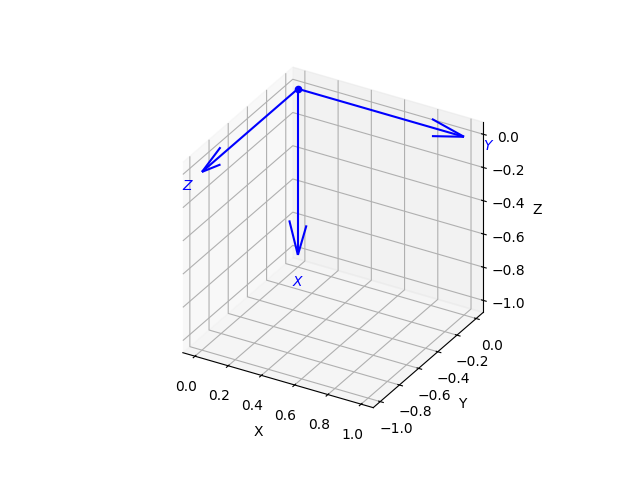

In [48]:
plotvol3(new=True)  # for matplotlib/widget
trplot(Ryx);

### 2.3.1.2 Three-Angle Representations


In [49]:
R = rotz(0.1) @ roty(0.2) @ rotz(0.3);

In [50]:
R = eul2r(0.1, 0.2, 0.3)

array([[  0.9021,  -0.3836,   0.1977],
       [  0.3875,   0.9216,  0.01983],
       [ -0.1898,  0.05871,   0.9801]])

In [51]:
gamma = tr2eul(R)

array([     0.1,      0.2,      0.3])

In [52]:
R = eul2r(0.1, -0.2, 0.3)

array([[  0.9021,  -0.3836,  -0.1977],
       [  0.3875,   0.9216, -0.01983],
       [  0.1898, -0.05871,   0.9801]])

In [53]:
gamma = tr2eul(R)

array([  -3.042,      0.2,   -2.842])

In [54]:
eul2r(gamma)

array([[  0.9021,  -0.3836,  -0.1977],
       [  0.3875,   0.9216, -0.01983],
       [  0.1898, -0.05871,   0.9801]])

In [55]:
R = eul2r(0.1, 0, 0.3)

array([[  0.9211,  -0.3894,        0],
       [  0.3894,   0.9211,        0],
       [       0,        0,        1]])

In [56]:
tr2eul(R)

array([       0,        0,      0.4])

In [57]:
R = rpy2r(0.1, 0.2, 0.3, order="zyx")

array([[  0.9363,  -0.2751,   0.2184],
       [  0.2896,   0.9564, -0.03696],
       [ -0.1987,  0.09784,   0.9752]])

In [58]:
gamma = tr2rpy(R, order="zyx")

array([     0.1,      0.2,      0.3])

In [59]:
R = rpy2r(0.1, 0.2, 0.3, order="xyz")

array([[  0.9752, -0.09784,   0.1987],
       [  0.1538,   0.9447,  -0.2896],
       [ -0.1593,    0.313,   0.9363]])

In [60]:
gamma = tr2rpy(R, order="xyz")

array([     0.1,      0.2,      0.3])

<span style="background-color:red; font-size:20pt">NOTE</span>

The next cell will launch an interactive tool (using the Swift visualizer) in a new browser tab.  Close the browser tab when you are done with it. 

You might also have to stop the cell from executing, by pressing the stop button for the cell. It may terminate with lots of errors, don't panic.

In [61]:
if COLAB or not SWIFT:
    print("we can't run this demo from the Colab environment (yet)")
else:
    %run -m tripleangledemo

we can't run this demo from the Colab environment (yet)


In [62]:
T0 = transl(0, 0, 0)
A = transl(0, 3, 0)
B = trotx(30, "deg") @ trotz(-30, "deg")
AB = A @ B
BA = B @ A

array([[   0.866,      0.5,        0,      1.5],
       [  -0.433,     0.75,     -0.5,     2.25],
       [   -0.25,    0.433,    0.866,    1.299],
       [       0,        0,        0,        1]])

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

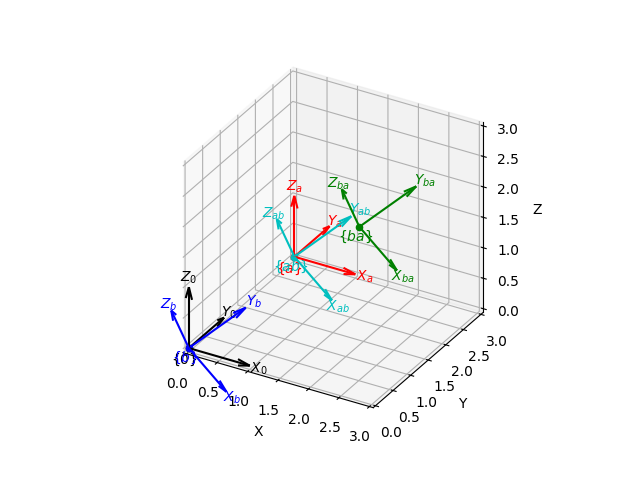

In [63]:
plotvol3([0, 3], new=True)
trplot(T0, frame="0", color="k")
trplot(A, frame="a", color="r")
trplot(B, frame="b", color="b")
trplot(AB, frame="ab", color="c")
trplot(BA, frame="ba", color="g")


In [64]:
plotvol3(new=True)  # for matplotlib/widget
HTML(tranimate(BA, movie=True, dim=2.0))

### 2.3.1.3 Singularities and Gimbal Lock


### 2.3.1.4 Two-Vector Representation


In [65]:
a = [0, 0, -1]

[0, 0, -1]

In [66]:
o = [1, 1, 0]

[1, 1, 0]

In [67]:
R = oa2r(o, a)

array([[ -0.7071,   0.7071,        0],
       [  0.7071,   0.7071,        0],
       [       0,        0,       -1]])

### 2.3.1.5 Rotation about an Arbitrary Vector


In [68]:
R = rpy2r(0.1, 0.2, 0.3);

In [69]:
theta, v = tr2angvec(R)

In [70]:
theta

0.3655021863566987

In [71]:
v

array([  0.1886,   0.5834,     0.79])

In [72]:
e, x = np.linalg.eig(R)

In [73]:
e

array([0.93394439+0.35741835j, 0.93394439-0.35741835j, 1.        +0.j        ])

In [74]:
x

array([[ 0.69442042+0.j        ,  0.69442042-0.j        ,  0.18857511+0.j        ],
       [-0.07921035-0.56882404j, -0.07921035+0.56882404j,  0.58337798+0.j        ],
       [-0.10726605+0.42004668j, -0.10726605-0.42004668j,  0.79000605+0.j        ]])

In [75]:
theta = np.angle(e[0])

0.3655021863566988

In [76]:
R = angvec2r(0.3, [1, 0, 0])

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

### 2.3.1.6 Matrix Exponential for Rotation


In [77]:
R = rotx(0.3)

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

In [78]:
L = linalg.logm(R)

array([[       0,        0,        0],
       [       0,        0,     -0.3],
       [       0,      0.3,        0]])

In [79]:
S = vex(L)

array([     0.3,        0,        0])

In [80]:
L = trlog(R);

In [81]:
linalg.expm(L)

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

In [82]:
trexp(L);

In [83]:
linalg.expm(skew(S))

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

In [84]:
R = rotx(0.3);

In [85]:
R = linalg.expm(0.3 * skew([1, 0, 0]));

In [86]:
X = skew([1, 2, 3])

array([[ 0, -3,  2],
       [ 3,  0, -1],
       [-2,  1,  0]])

In [87]:
vex(X)

array([       1,        2,        3])

### 2.3.1.7 Unit Quaternions


In [88]:
q = UnitQuaternion(rpy2r(0.1, 0.2, 0.3))

 0.9833 <<  0.0343,  0.1060,  0.1436 >>


In [89]:
q = q * q;

In [90]:
q.inv()

 0.9339 << -0.0674, -0.2085, -0.2824 >>


In [91]:
q * q.inv()

 1.0000 <<  0.0000,  0.0000,  0.0000 >>


In [92]:
q / q

 1.0000 <<  0.0000,  0.0000,  0.0000 >>


In [93]:
q.R

array([[  0.7536,  -0.4993,   0.4275],
       [  0.5555,   0.8315, -0.008145],
       [ -0.3514,   0.2436,    0.904]])

In [94]:
q * [1, 0, 0]

array([  0.7536,   0.5555,  -0.3514])

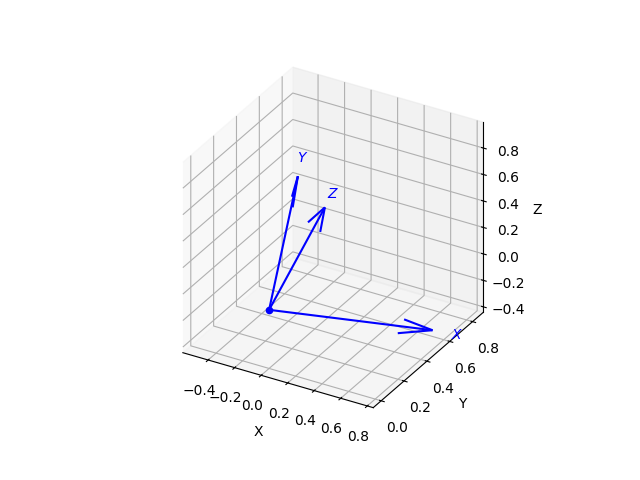

In [95]:
plotvol3(new=True)  # for matplotlib/widget
q.plot();

## 2.3.2 Pose in Three Dimensions


### 2.3.2.1 Homogeneous Transformation Matrix


In [96]:
T = transl(2, 0, 0) @ trotx(pi / 2) @ transl(0, 1, 0)

array([[       1,        0,        0,        2],
       [       0,        0,       -1,        0],
       [       0,        1,        0,        1],
       [       0,        0,        0,        1]])

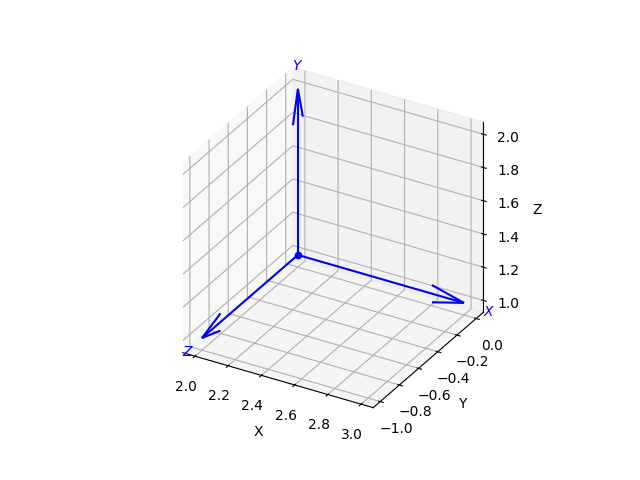

In [97]:
plotvol3(new=True)  # for matplotlib/widget
trplot(T);

In [98]:
t2r(T)

array([[       1,        0,        0],
       [       0,        0,       -1],
       [       0,        1,        0]])

In [99]:
transl(T)

array([       2,        0,        1])

### 2.3.2.2 Matrix exponential for Pose


In [100]:
T = transl(2, 3, 4) @ trotx(0.3)

array([[       1,        0,        0,        2],
       [       0,   0.9553,  -0.2955,        3],
       [       0,   0.2955,   0.9553,        4],
       [       0,        0,        0,        1]])

In [101]:
L = linalg.logm(T)

array([[       0,        0,        0,        2],
       [       0,        0,     -0.3,    3.577],
       [       0,      0.3,        0,     3.52],
       [       0,        0,        0,        0]])

In [102]:
S = vexa(L)

array([       2,    3.577,     3.52,      0.3,        0,        0])

In [103]:
linalg.expm(skewa(S))

array([[       1,        0,        0,        2],
       [       0,   0.9553,  -0.2955,        3],
       [       0,   0.2955,   0.9553,        4],
       [       0,        0,        0,        1]])

In [104]:
X = skewa([1, 2, 3, 4, 5, 6])

array([[       0,       -6,        5,        1],
       [       6,        0,       -4,        2],
       [      -5,        4,        0,        3],
       [       0,        0,        0,        0]])

In [105]:
vexa(X)

array([       1,        2,        3,        4,        5,        6])

### 2.3.2.3 3D Twists


In [106]:
S = Twist3.UnitRevolute([0, 1, 0], [0, 0, 0])

(0 0 0; 0 1 0)

In [107]:
linalg.expm(0.3 * skewa(S.S));  # different to book, see §2.2.1.2

In [108]:
S.exp(0.3)

   0.9553    0         0.2955    0         
   0         1         0         0         
  -0.2955    0         0.9553    0         
   0         0         0         1         


In [109]:
S = Twist3.UnitRevolute([0, 1, 0], [2, 3, 2], 0.5)

(-2 0.5 2; 0 1 0)

In [110]:
X = transl(3, 4, -4);

Axes3D(0.125,0.11;0.775x0.77)


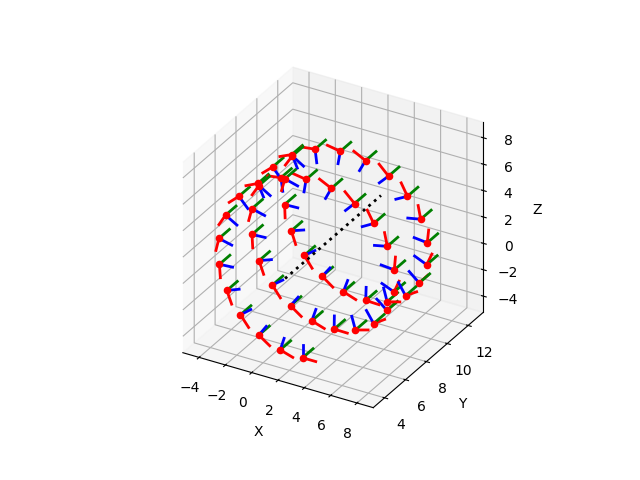

In [111]:
plotvol3(new=True)  # for matplotlib/widget
for theta in np.arange(0, 15, 0.3):
  trplot(S.exp(theta).A @ X, style="rviz", width=2)

L = S.line()
L.plot('k:', linewidth=2);


In [112]:
S = Twist3.UnitPrismatic([0, 1, 0])

(0 1 0; 0 0 0)

In [113]:
S.exp(2)

   1         0         0         0         
   0         1         0         2         
   0         0         1         0         
   0         0         0         1         


In [114]:
T = transl(1, 2, 3) @ eul2tr(0.3, 0.4, 0.5);
S = Twist3(T)

(1.1204 1.6446 3.1778; 0.041006 0.4087 0.78907)

In [115]:
S.w

array([ 0.04101,   0.4087,   0.7891])

In [116]:
S.pole

array([0.001138,   0.8473,  -0.4389])

In [117]:
S.pitch

3.2256216289351296

In [118]:
S.theta

0.8895797456112914

# 2.4 Advanced Topics


## 2.4.5 Distance Between Orientations


In [119]:
UnitQuaternion.Rx(pi / 2).angdist(UnitQuaternion.Rz(-pi / 2))

1.0471975511965976

## 2.4.6 Normalization


In [120]:
R = np.eye(3,3);
np.linalg.det(R) - 1

0.0

In [121]:
for i in range(100):
  R = R @ rpy2r(0.2, 0.3, 0.4);
np.linalg.det(R) - 1

4.218847493575595e-15

In [122]:
R = trnorm(R);

In [123]:
np.linalg.det(R) - 1

0.0

In [124]:
q = q.unit();

In [125]:
# T = T1 @ T2
# q = q1 @ q2

## 2.4.8 More About Twists


In [126]:
S = Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])

(0 0 0; 1 0 0)

In [127]:
S.S
S.v
S.w

array([       1,        0,        0])

In [128]:
S.skewa()

array([[       0,        0,        0,        0],
       [       0,        0,       -1,        0],
       [       0,        1,        0,        0],
       [       0,        0,        0,        0]])

In [129]:
trexp(0.3 * S.skewa())

array([[       1,        0,        0,        0],
       [       0,   0.9553,  -0.2955,        0],
       [       0,   0.2955,   0.9553,        0],
       [       0,        0,        0,        1]])

In [130]:
S.exp(0.3)

   1         0         0         0         
   0         0.9553   -0.2955    0         
   0         0.2955    0.9553    0         
   0         0         0         1         


In [131]:
S2 = S * S
S2.printline(orient="angvec", unit="rad")

t = 0, 0, 0; angvec = (2 | 1, 0, 0)


In [132]:
line = S.line()

{ 0 0 0; 1 0 0}

Axes3D(0.125,0.11;0.775x0.77)


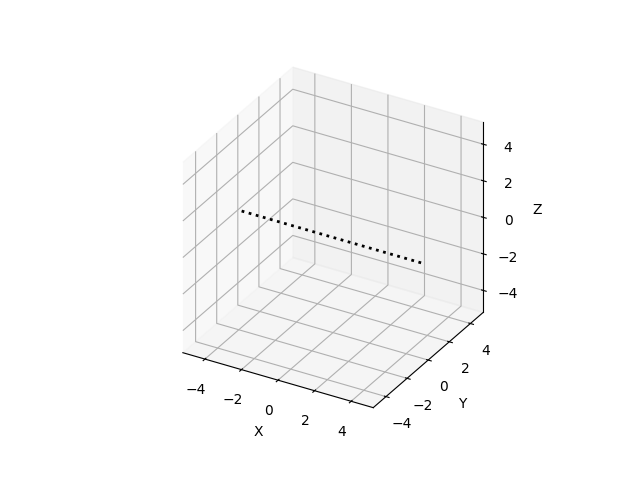

In [133]:
plotvol3([-5, 5], new=True)  # setup volume in which to display the line
line.plot("k:", linewidth=2);

In [134]:
T = transl(1, 2, 3) @ eul2tr(0.3, 0.4, 0.5);
S = Twist3(T)

(1.1204 1.6446 3.1778; 0.041006 0.4087 0.78907)

In [135]:
S / S.theta

(1.2594 1.8488 3.5722; 0.046096 0.45943 0.88702)

In [136]:
S.unit();

In [137]:
S.exp(0)

   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


In [138]:
S.exp(1)

   0.6305   -0.6812    0.372     1         
   0.6969    0.7079    0.1151    2         
  -0.3417    0.1867    0.9211    3         
   0         0         0         1         


In [139]:
S.exp(0.5)

   0.9029   -0.3796    0.2017    0.5447    
   0.3837    0.9232    0.01982   0.9153    
  -0.1937    0.05949   0.9793    1.542     
   0         0         0         1         


<span style="background-color:red; font-size:20pt">NOTE</span>

The next cell will launch an interactive tool (using the Swift visualizer) in a new browser tab.  Close the browser tab when you are done with it. 

You might also have to stop the cell from executing, by pressing the stop button for the cell. It may terminate with lots of errors, don't panic.

In [140]:
if COLAB or not SWIFT:
    print("we can't run this demo from the Colab environment (yet)")
else:
    %run -m twistdemo

we can't run this demo from the Colab environment (yet)


# 2.5 Using the Toolbox


In [141]:
from spatialmath.base import *

In [142]:
from spatialmath import *

In [143]:
R = rotx(0.3)  # create SO(3) matrix as NumPy array
type(R)
R = SO3.Rx(0.3)  # create SO3 object
type(R)

spatialmath.pose3d.SO3

In [144]:
R.A

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

In [145]:
R = SO3(rotx(0.3));                   # convert an SO(3) matrix
R = SO3.Rz(0.3);                      # rotation about z-axis
R = SO3.RPY(10, 20, 30, unit="deg");  # from roll-pitch-yaw angles
R = SO3.AngleAxis(0.3, (1, 0, 0));    # from angle and rotation axis
R = SO3.EulerVec((0.3, 0, 0));        # from an Euler vector

In [146]:
R.rpy();        # convert to roll-pitch-yaw angles
R.eul();        # convert to Euler angles
R.printline();  # compact single-line print

 rpy/zyx = 17.2°, 0°, 0°


In [147]:
R = SO3.RPY(10, 20, 30, unit="deg");             # create an SO(3) rotation
T = SE3.RPY(10, 20, 30, unit="deg");             # create a purely rotational SE(3)
S = Twist3.RPY(10, 20, 30, unit="deg");          # create a purely rotational twist
q = UnitQuaternion.RPY(10, 20, 30, unit="deg");  # create a unit quaternion

In [148]:
TA = SE2(1, 2) * SE2(30, unit="deg");
type(TA)

spatialmath.pose2d.SE2

In [149]:
TA

   0.866    -0.5       1         
   0.5       0.866     2         
   0         0         1         


In [150]:
TA = SE2(1, 2, 30, unit="deg");

In [151]:
TA.R
TA.t

array([       1,        2])

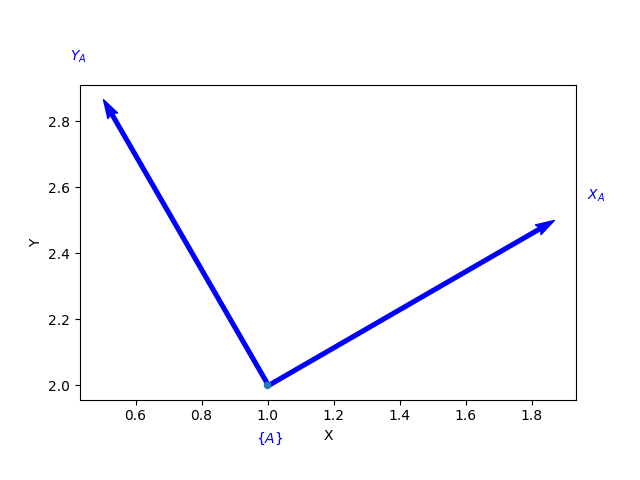

In [152]:
plotvol2(new=True)  # for matplotlib/widget
TA.plot(frame="A", color="b");

In [153]:
TA.printline()

t = 1, 2; 30°


In [154]:
P = [3, 2];
TA.inv() * P

array([[   1.732],
       [      -1]])

In [155]:
R = SO3.Rx(np.linspace(0, 1, 5));
len(R)
R[3]

   1         0         0         
   0         0.7317   -0.6816    
   0         0.6816    0.7317    


In [156]:
R * [1, 2, 3]

array([[       1,        1,        1,        1,        1],
       [       2,    1.196,   0.3169,  -0.5815,   -1.444],
       [       3,    3.402,    3.592,    3.558,    3.304]])